confronto cpu singol - cpu parallel - gpu

In [1]:
import tensorflow as tf
import time
import numpy
esponenti = 10
dims = numpy.power(2,numpy.arange(esponenti)+1)
print(dims)

sessione = tf.Session()


tempo = numpy.zeros((4, esponenti))

startone = time.time()
for i in numpy.arange(esponenti):

    N = dims[i]
    
    matr1NP64 = numpy.random.rand(N,N)
    matr2NP64 = numpy.random.rand(N,N)

    matr1NP32 = matr1NP64.astype(numpy.float32)
    matr2NP32 = matr2NP64.astype(numpy.float32)

    matr1TF32 = tf.constant(matr1NP32)
    matr2TF32 = tf.constant(matr2NP32)
    
    
    matr1TF64 = tf.constant(matr1NP64)
    matr2TF64 = tf.constant(matr2NP64)
    
    
    start = time.time()
    #prodNP64 = numpy.dot(matr1NP64,matr2NP64)
    stop = time.time()
    tempo[0,i] = stop-start    

    
    start = time.time()
    #prodNP32 = numpy.dot(matr1NP32,matr2NP32)
    stop = time.time()    
    tempo[1,i] = stop-start
    
    
    prodTF64 = tf.matmul(matr1TF64,matr2TF64)
    start = time.time()
    prodTF64 = sessione.run(prodTF64)
    stop = time.time()
    tempo[2,i] = stop-start
    
    
    
    prodTF32 = tf.matmul(matr1TF32, matr2TF32)
    start = time.time()
    prodTF32 = sessione.run(prodTF32)
    stop = time.time()
    tempo[3,i] = stop-start

endone = time.time()
print(endone-startone)

numpy.save('benches.npy', tempo)

[   2    4    8   16   32   64  128  256  512 1024]
1.7727129459381104


[2 4 8]
Tensor("Const_18:0", shape=(2, 2), dtype=float32) Tensor("Const_19:0", shape=(2, 2), dtype=float32)
Tensor("Const_20:0", shape=(2, 2), dtype=float64) Tensor("Const_21:0", shape=(2, 2), dtype=float64)
Tensor("Const_22:0", shape=(4, 4), dtype=float32) Tensor("Const_23:0", shape=(4, 4), dtype=float32)
Tensor("Const_24:0", shape=(4, 4), dtype=float64) Tensor("Const_25:0", shape=(4, 4), dtype=float64)
Tensor("Const_26:0", shape=(8, 8), dtype=float32) Tensor("Const_27:0", shape=(8, 8), dtype=float32)
Tensor("Const_28:0", shape=(8, 8), dtype=float64) Tensor("Const_29:0", shape=(8, 8), dtype=float64)


14000
(37,)
27
10
37


<IPython.core.display.Javascript object>


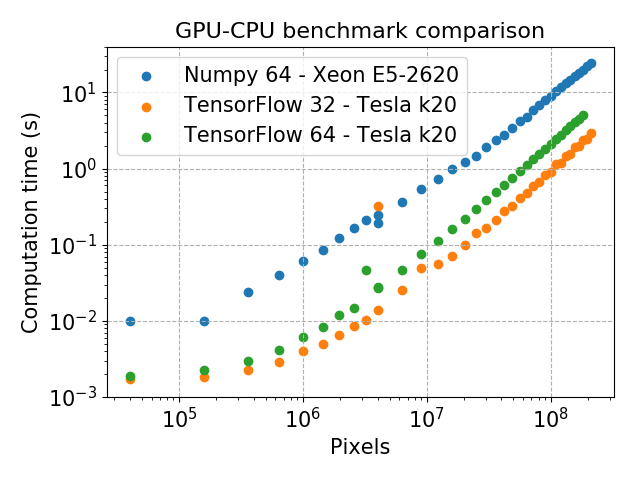

In [6]:
import numpy
maxmat = 15000
coordinate = numpy.concatenate((numpy.arange(200,2001,200),numpy.arange(2000,maxmat+1,500)))
print(coordinate[-3])
coordinate = numpy.power(coordinate,2)
print(coordinate.shape)
tempiCPU2 = numpy.load('2to15mila/benchCPU64.npy')
tempiGPU2 = numpy.load('2to15mila/benchGPU32.npy')
tempiGPU642 = numpy.load('2to15mila/benchGPU64.npy')
print(tempiCPU2.size)

tempiCPU = numpy.load('200to2000/benchCPU64.npy')
tempiGPU = numpy.load('200to2000/benchGPU32.npy')
tempiGPU64 = numpy.load('200to2000/benchGPU64.npy')
print(tempiCPU.size)

tempiCPU = numpy.concatenate((tempiCPU,tempiCPU2))
tempiGPU = numpy.concatenate((tempiGPU,tempiGPU2))
tempiGPU64 = numpy.concatenate((tempiGPU64,tempiGPU642))
print(tempiCPU.size)

from matplotlib import pyplot
%matplotlib notebook
import matplotlib as mpl
%matplotlib notebook
mpl.rcParams['font.size'] = 15
#pyplot.figure(figsize=(7, 5))
#pyplot.semilogx()
#pyplot.loglog()
#pyplot.scatter(dims,tempiCPU, label = 'Numpy 64 i7-4710HQ')

pyplot.scatter(coordinate[:-1],tempiCPU[:-1], label = 'Numpy 64 - Xeon E5-2620')

pyplot.scatter(coordinate[:-1],tempiGPU[:-1], label = 'TensorFlow 32 - Tesla k20')

pyplot.scatter(coordinate[:-3],tempiGPU64[:-3], label = 'TensorFlow 64 - Tesla k20')

#pyplot.title('Matrix multiplication')
pyplot.loglog()
pyplot.ylim(1e-3)
pyplot.xlabel('Pixels', fontsize = 15)
pyplot.ylabel('Computation time (s)', fontsize = 15)
pyplot.title('GPU-CPU benchmark comparison', fontsize = 16)
pyplot.grid(True, linestyle = '--')
pyplot.legend()
pyplot.tight_layout()
pyplot.savefig("/home/protoss/Documenti/tesiarticol/thesis/img/cap3/cgpucomplog.pdf", format='pdf')


In [17]:
print(coordinate[-3]*64)

14000*14000/1e6

12544000000


196.0

(26,)
16
10
26


<IPython.core.display.Javascript object>


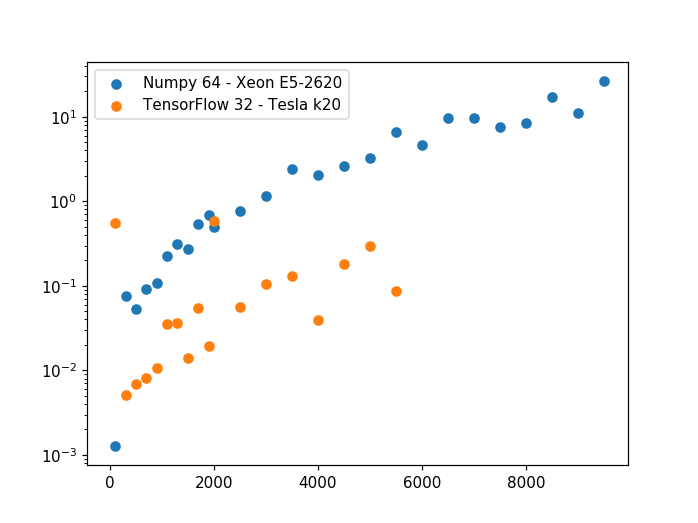

In [65]:
import numpy
coordinate = numpy.concatenate((numpy.arange(100,2000,200),numpy.arange(2000,10000,500)))
print(coordinate.shape)
fftCPU2 = numpy.load('2to10mila/fftCPU64.npy')
fftGPU2 = numpy.load('2to10mila/fftGPU32.npy')
#tempiGPU642 = numpy.load('2to10mila/fftGPU64.npy')
print(fftGPU2.size)

fftCPU = numpy.load('100to2000/fftCPU64.npy')
fftGPU = numpy.load('100to2000/fftGPU32.npy')
#tempiGPU64 = numpy.load('100to2000/fftGPU64.npy')
print(fftGPU.size)

fftCPU = numpy.concatenate((fftCPU,fftCPU2))
fftGPU = numpy.concatenate((fftGPU,fftGPU2))
#tempiGPU64 = numpy.concatenate((tempiGPU64,tempiGPU642))
print(fftGPU.size)

from matplotlib import pyplot
%matplotlib notebook
pyplot.semilogy()
#pyplot.scatter(dims,tempiCPU, label = 'Numpy 64 i7-4710HQ')
pyplot.scatter(coordinate,fftCPU, label = 'Numpy 64 - Xeon E5-2620')
#pyplot.scatter(coordinate,fftGPU64, label = 'TensorFlow 64 Tesla k20')
pyplot.scatter(coordinate,fftGPU, label = 'TensorFlow 32 - Tesla k20')
pyplot.legend()

plot gflops nvidia geforce single, nvidia tesla single, nvidia tesla double, i7 single, i7double 

In [21]:
import numpy
import time

N = 4000

startuni=time.time()
matr = numpy.random.rand(N*N)
stopuni = time.time()

startnorm = time.time()
matr = numpy.random.normal(size = N*N)
stopnorm = time.time()





print(stopuni-startuni, stopnorm-startnorm)

0.16554498672485352 0.6598391532897949


In [32]:
N = 500
matr2 = numpy.random.rand(N*N)
matr1 = numpy.random.rand(N*N)

matr22 = numpy.random.rand(N*N).astype(numpy.float32)
matr12 = numpy.random.rand(N*N).astype(numpy.float32)

start = time.time()
prod1 = numpy.dot(matr2,matr1)
stop = time.time()
print(stop-start)

start = time.time()
prod2 = numpy.dot(matr22,matr12)
stop = time.time()

print(stop-start)

0.0006539821624755859
0.000408172607421875


In [19]:
import tensorflow as tf
import time

N = 4000

sessione = tf.Session()

startuni=time.time()
matr = tf.random_uniform(shape=(N,N))
matr = sessione.run(matr)
stopuni = time.time()


startnorm = time.time()
matr = tf.random_normal(shape = (N,N))
matr = sessione.run(matr)
stopnorm = time.time()



print(stopuni-startuni, stopnorm-startnorm)

0.1090078353881836 0.11973905563354492


In [1]:
import scipy.io


structyLL = scipy.io.loadmat("/m100_work/INF20_virgo_1/ilarosa0/data/in_O3LL_03_0764_.mat")
structyLH = scipy.io.loadmat("/m100_work/INF20_virgo_1/ilarosa0/data/in_O3LH_03_0764_.mat")

In [2]:
structyLL

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Oct 15 23:33:36 2020',
 '__version__': '1.0',
 '__globals__': [],
 'job_pack_0': array([[(array([[(array([[167]], dtype=uint8), array([[180.        ,  90.        , 360.        ,  90.        ,
          89.65754837],
        [  0.        ,  89.65754837,  51.42857143,  90.        ,
          89.31509062],
        [ 51.42857143,  89.65754837,  51.42857143,  90.        ,
          89.31509062],
        ...,
        [257.14285714, -89.65754837,  51.42857143, -89.31509062,
         -90.        ],
        [308.57142857, -89.65754837,  51.42857143, -89.31509062,
         -90.        ],
        [180.        , -90.        , 360.        , -89.65754837,
         -90.        ]]), array([[ 90.        ],
        [ 89.65754837],
        [ 89.31509062],
        [ 88.97261453],
        [ 88.63010784],
        [ 88.2875583 ],
        [ 87.94495366],
        [ 87.60228164],
        [ 87.25952993],
        [ 86.91668621],
        [ 86

In [3]:
structyLH

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Oct 14 18:18:26 2020',
 '__version__': '1.0',
 '__globals__': [],
 'job_pack_0': array([[(array([[(array([[167]], dtype=uint8), array([[180.        ,  90.        , 360.        ,  90.        ,
          89.65754837],
        [  0.        ,  89.65754837,  51.42857143,  90.        ,
          89.31509062],
        [ 51.42857143,  89.65754837,  51.42857143,  90.        ,
          89.31509062],
        ...,
        [257.14285714, -89.65754837,  51.42857143, -89.31509062,
         -90.        ],
        [308.57142857, -89.65754837,  51.42857143, -89.31509062,
         -90.        ],
        [180.        , -90.        , 360.        , -89.65754837,
         -90.        ]]), array([[ 90.        ],
        [ 89.65754837],
        [ 89.31509062],
        [ 88.97261453],
        [ 88.63010784],
        [ 88.2875583 ],
        [ 87.94495366],
        [ 87.60228164],
        [ 87.25952993],
        [ 86.91668621],
        [ 86

In [10]:
cands = scipy.io.loadmat('/m100_work/INF20_virgo_1/ilarosa0/data/out_1.mat')

In [11]:
cands['cands'].shape


(2384800, 8)

In [12]:
2384800/400

5962.0